In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm

In [46]:
moradia = pd.read_csv("dataset/Housing.csv")

In [47]:
moradia.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [48]:
moradia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [49]:
moradia.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [50]:
moradia.shape

(545, 13)

In [51]:
moradia.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [52]:
moradia.price.median()

4340000.0

In [53]:
moradia[moradia.price <= 4340000.0]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
270,4340000,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
272,4340000,4075,3,1,1,yes,yes,yes,no,no,2,no,semi-furnished
273,4340000,3500,4,1,2,yes,no,no,no,no,2,no,furnished
274,4340000,6450,4,1,2,yes,no,no,no,no,0,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


<AxesSubplot: >

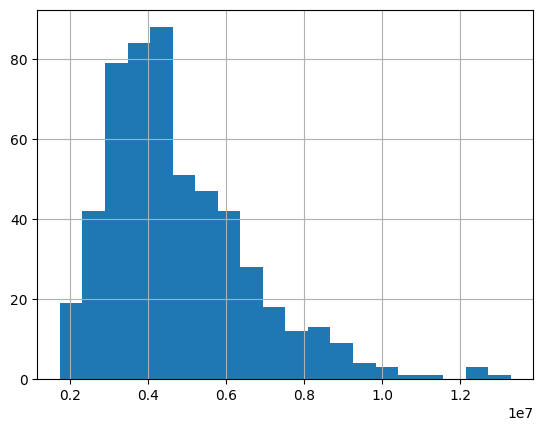

In [54]:
moradia.price.hist(bins=20)

<AxesSubplot: >

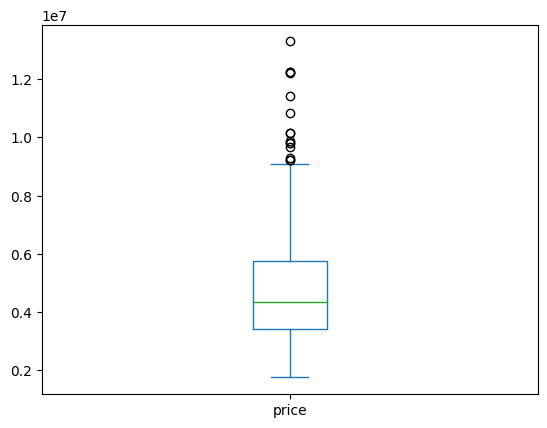

In [55]:
moradia.price.plot.box()

In [56]:
# O que faz uma casa ser mais cara ou mais barata
moradia.sort_values('price', ascending=False)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [57]:
moradia[moradia.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


<AxesSubplot: xlabel='bathrooms', ylabel='price'>

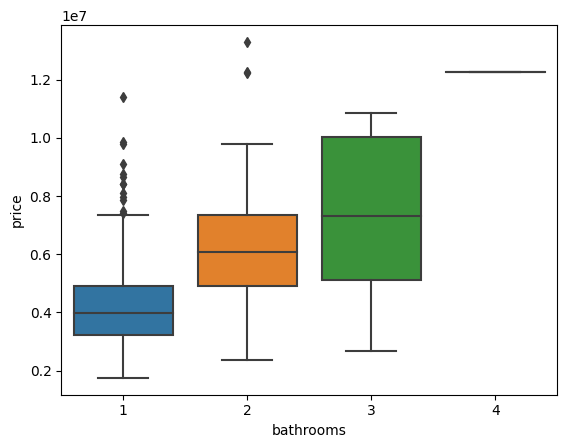

In [58]:
sns.boxplot(x='bathrooms', y='price', data=moradia)

In [59]:
moradia.bathrooms.value_counts().head()

1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

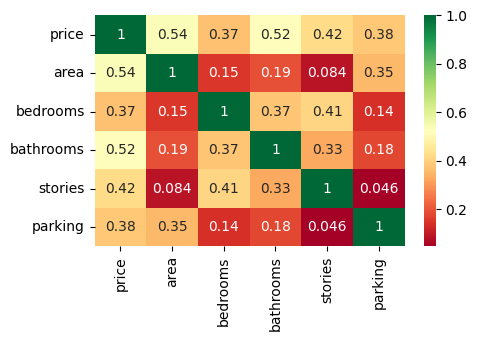

In [60]:
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(moradia.corr(numeric_only = True),annot=True, cmap='RdYlGn')
plt.show()

In [61]:
moradia.corr(numeric_only = True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


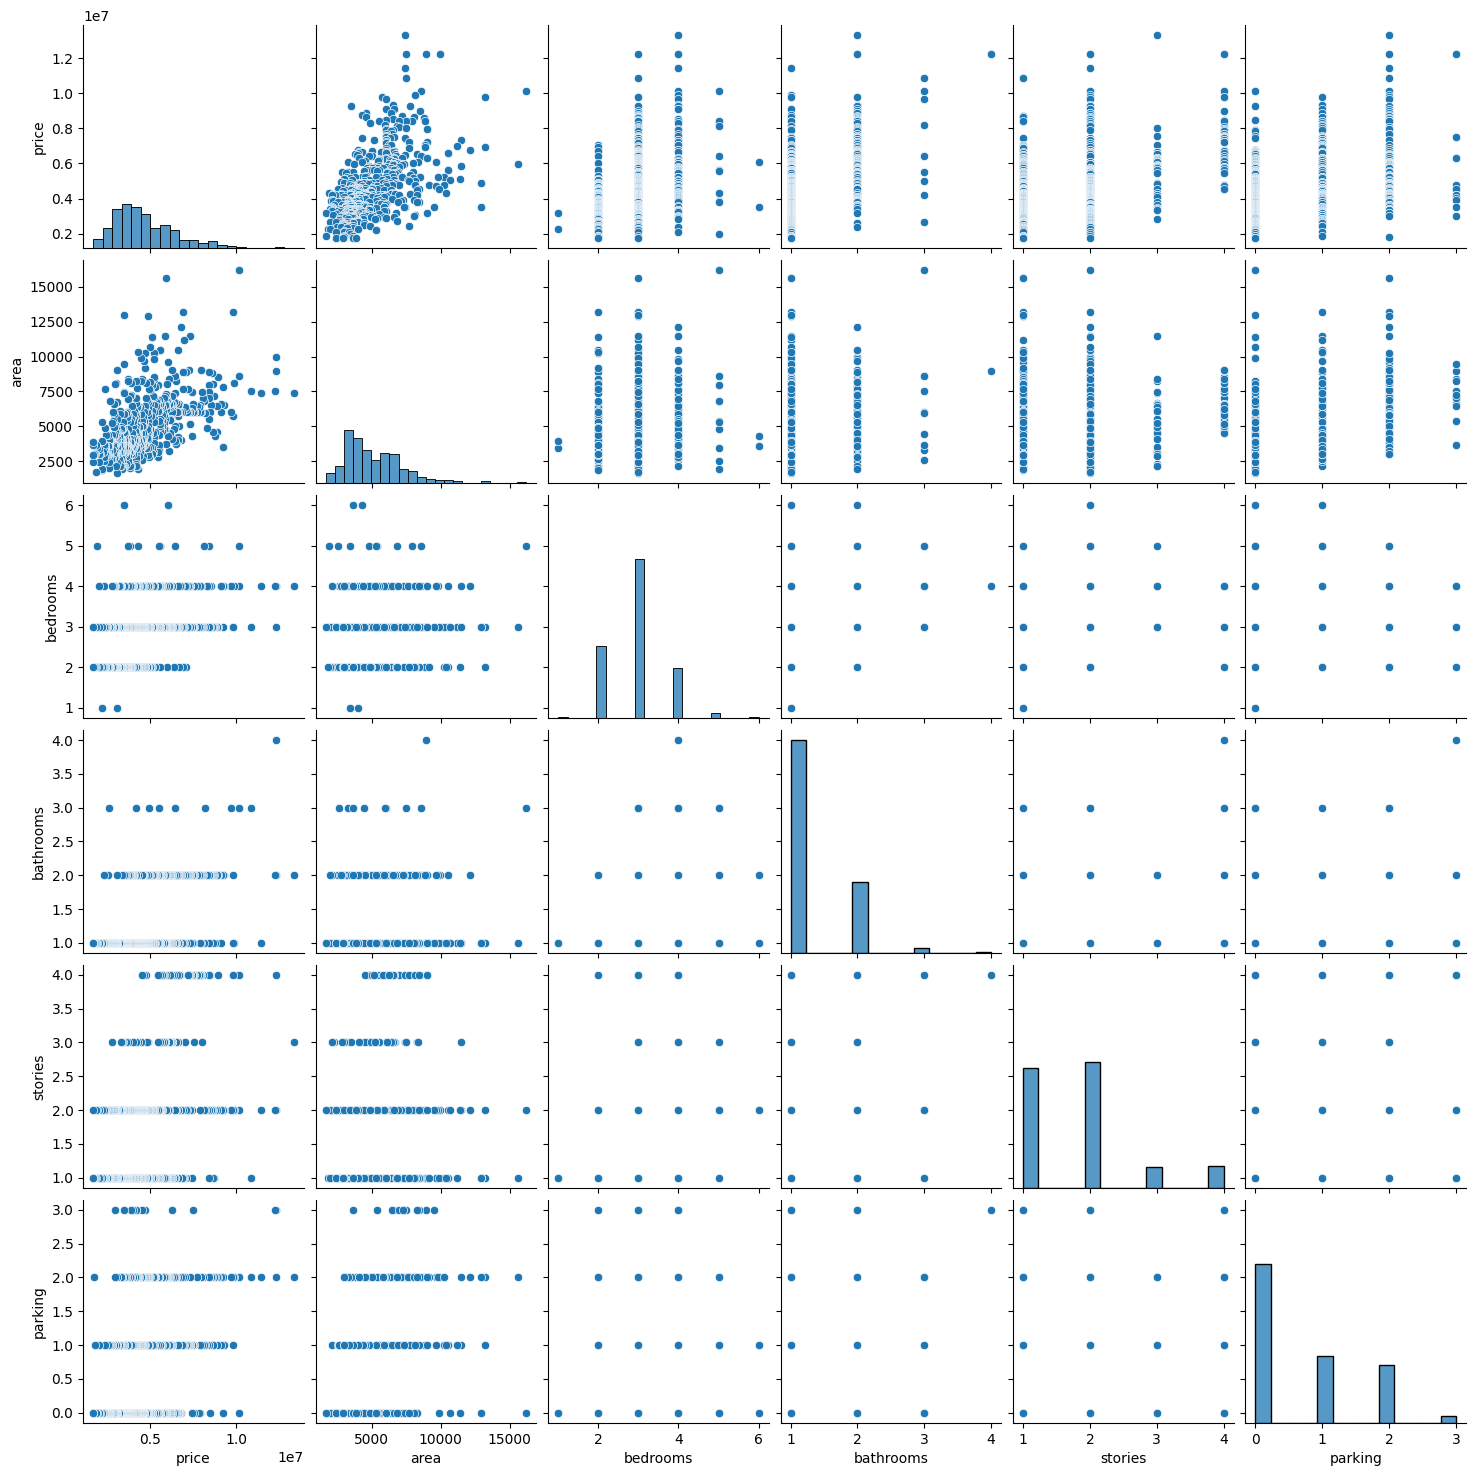

In [62]:
sns.pairplot(moradia)

In [63]:
moradia[moradia.area == moradia.area.max()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


In [64]:
moradia[moradia.price == moradia.price.max()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


In [65]:
moradia['preço_área'] = round(moradia.price/moradia.area)

In [66]:
moradia.preço_área.value_counts()

997.0     5
803.0     4
895.0     4
1191.0    3
944.0     3
         ..
1049.0    1
1424.0    1
838.0     1
448.0     1
455.0     1
Name: preço_área, Length: 422, dtype: int64

In [67]:
moradia.rename(columns={'média_preço_área': 'preço_área'}, inplace = True)

In [68]:
moradia.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,preço_área
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1792.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1367.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1230.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1629.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1538.0


## Regressão linear Simples e Múltipla

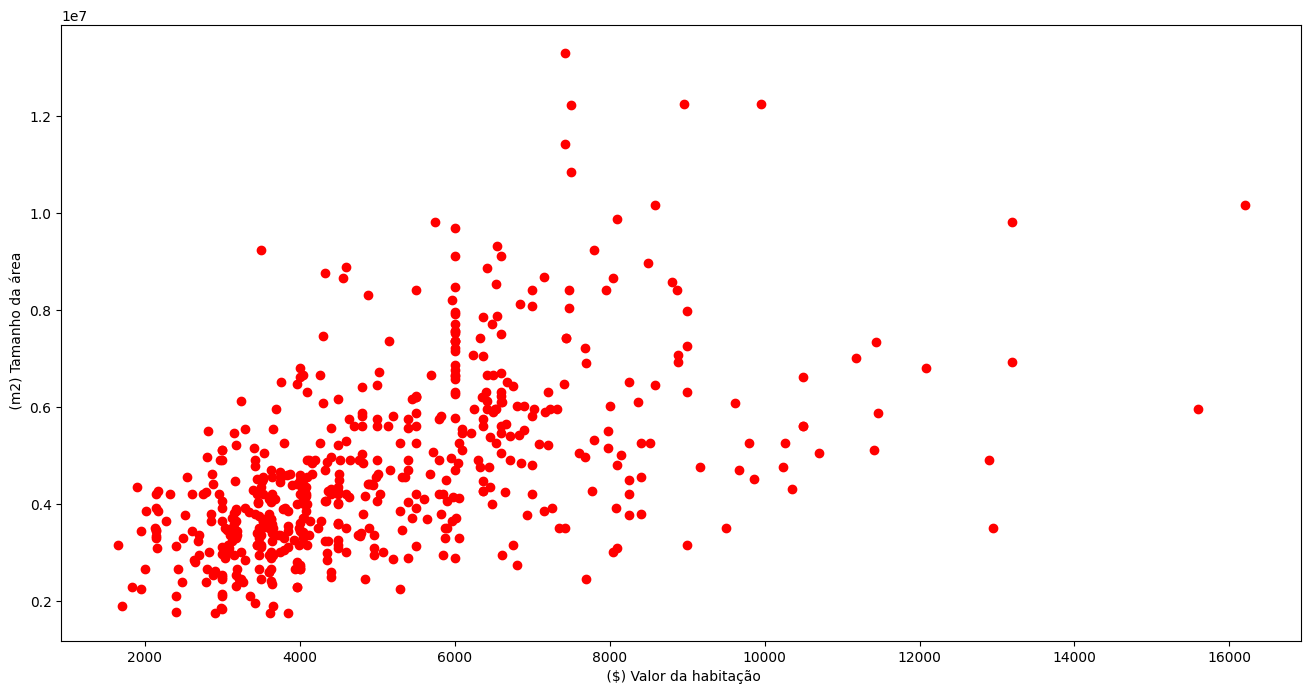

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    moradia['area'], 
    moradia['price'], 
    c='red')
plt.ylabel(" (m2) Tamanho da área")
plt.xlabel(" ($) Valor da habitação")
plt.show()

In [70]:
X = moradia['area'].values.reshape(-1,1)
y = moradia['price'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Preço = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Preço = 2.3873e+06 + 461.97X


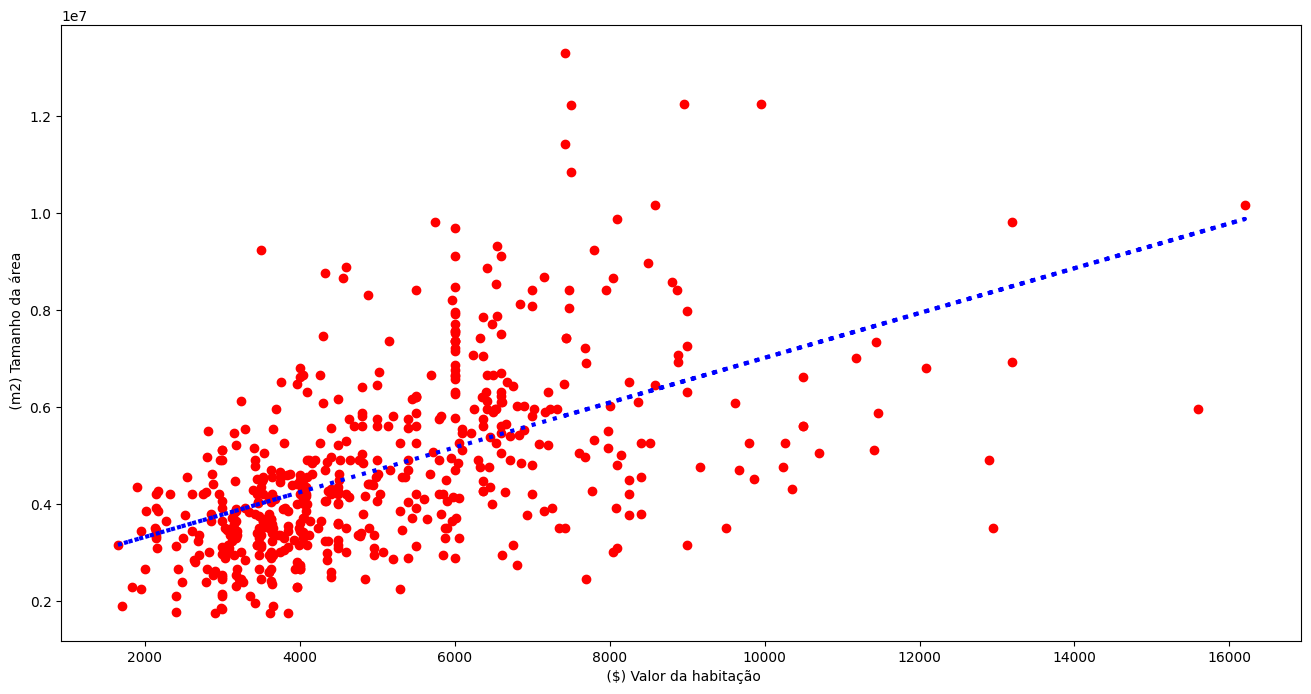

In [71]:
f_previsaoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter(
    moradia['area'], 
    moradia['price'], 
    c='red')


plt.plot(
    moradia['area'], 
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" ($) Valor da habitação")
plt.ylabel(" (m2) Tamanho da área")
plt.show()


In [72]:
X = moradia['area']
y = moradia['price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           7.39e-42
Time:                        10:29:06   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.387e+06   1.74e+05     13.681      0.0

In [73]:
moradia.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,preço_área
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1792.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1367.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1230.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1629.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1538.0


In [75]:
Xs = moradia.drop(['price', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], axis=1)
y = moradia['price'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(Xs, y)


print("O modleo é: Preço = {:.5} + {:.5}*area + {:.5}*bedrooms + {:.5}*bathrooms + {:.5}*stories + {:.5}*parking".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2], reg.coef_[0][3], reg.coef_[0][4]))

O modleo é: Preço = -3.5953e+06 + 699.45*area + -3.9421e+04*bedrooms + 4.4181e+05*bathrooms + 2.1831e+05*stories + 1.5784e+05*parking


In [76]:
X = np.column_stack((moradia['area'], moradia['bedrooms'], moradia['bathrooms'], moradia['stories'], moradia['parking']))
y = moradia['price']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           4.37e-94
Time:                        10:34:44   Log-Likelihood:                -8418.8
No. Observations:                 545   AIC:                         1.685e+04
Df Residuals:                     539   BIC:                         1.688e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.457e+05   2.47e+05     -0.591      0.5